In [34]:
from xdesign import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage.exposure import adjust_gamma, rescale_intensity
from scipy.spatial import Delaunay

<ipython-input-48-6aad74a04129>:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('SlantedSquares_sidebyside.png', dpi='figure',
<ipython-input-48-6aad74a04129>:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('SlantedSquares_sidebyside.png', dpi='figure',


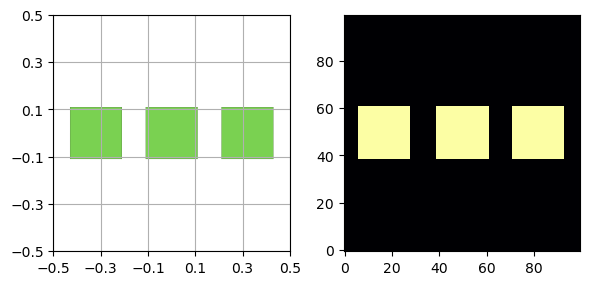

In [48]:
wet = SlantedSquares(count=3, angle=0.01/360*2*np.pi, gap=0.01)
SlantedSquares()
sidebyside(wet)
plt.savefig('SlantedSquares_sidebyside.png', dpi='figure',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show()

In [49]:
def rescale(reconstruction, hi):
    I = rescale_intensity(reconstruction, out_range=(0., 1.))
    return adjust_gamma(I, 1, hi)

In [50]:
#sx, sy = 100, 100
#sino, prb = sinogram(sx, sy, wet)
#wet.material = material.Material()
NPIXEL = 100
angles = np.linspace(0, np.pi, NPIXEL, endpoint=False),
positions = np.linspace(0, 1, NPIXEL, endpoint=False) - 0.5 + 1/NPIXEL/2
theta, h = np.meshgrid(angles, positions)
probe = Probe(size=1/NPIXEL)
sino = probe.measure(wet, theta, h)

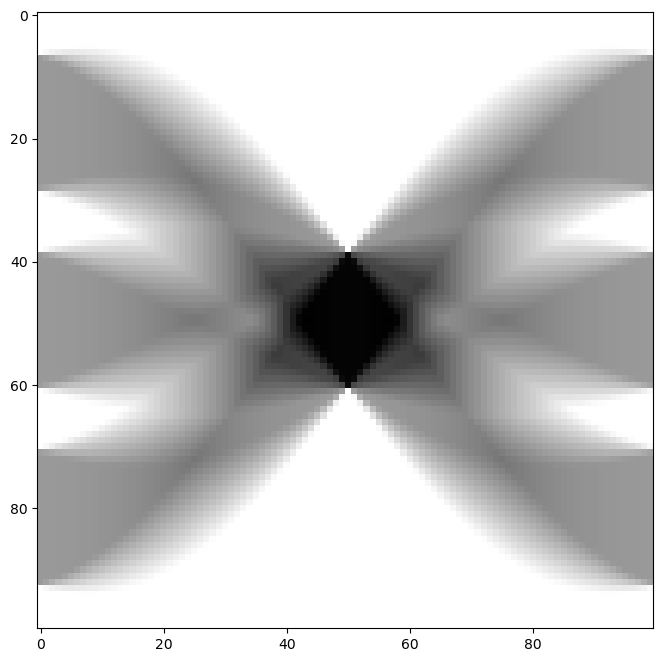

In [51]:
plt.figure(figsize=(8, 8))
plt.imshow(np.reshape(sino, (NPIXEL, NPIXEL)), cmap='gray', interpolation='nearest')
plt.show(block=True)

[##########] 100.00%


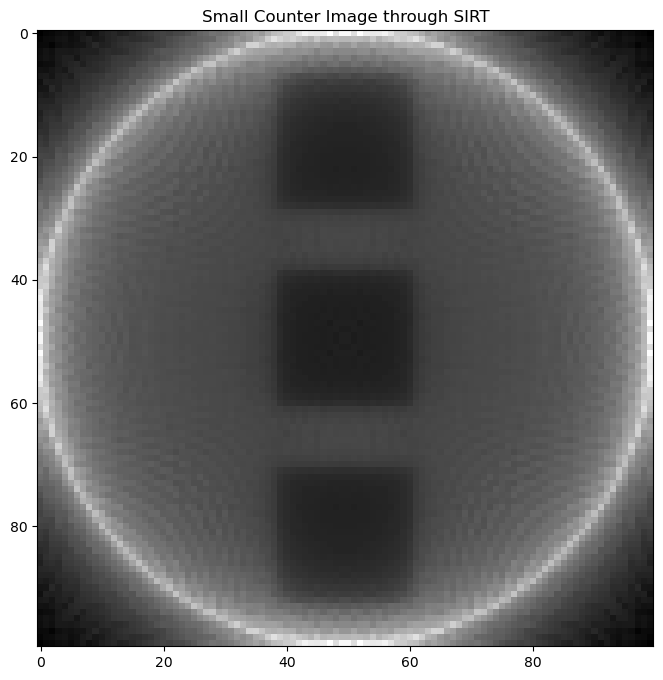

In [53]:
gmin = [-0.5, -0.5]
gsize = [1, 1]
hi = 1
niter = 20

# Reconstruct object.

init = 1e-12 * np.ones((NPIXEL, NPIXEL))
rec_sirt = sirt(gmin, gsize, sino, theta, h, init, niter)
rec_sirt = rescale(np.rot90(rec_sirt)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_sirt, cmap='gray', interpolation='none')
plt.title('Small Counter Image through SIRT')
plt.show()